## PRUEBA TÉCNICA DE ANALÍTICA

* Este archivo será el entorno de desarrollo donde se implementará la prueba técnica de analítica empresarial, siguiendo las instrucciones y objetivos definidos en el documento Prueba_técnica_analítica_Analítica_Empresarial.docx.

#### En el siguiente campo ingrese el número de cédula del aspirante:

1036665120

### Punto 1. Carga y exploración de datos

En esta sección se realizará la importación y exploración inicial de los conjuntos de datos que forman parte de la prueba técnica definida en el documento.

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
cen = pd.read_excel("insumos\Data_CapacidadEfectivaNeta.xlsx", header=0)
cen.head()

,Fecha,Tipo Generacion,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,COGENERADOR,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,...,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0
1,2018-01-01,EOLICA,NaN,1000.0,1000.0,1000.0,NaN,NaN,NaN,NaN,...,1460.0,1980.0,1450.0,1370.0,1610.0,1330.0,1000.0,1000.0,1000.0,1000.0
2,2018-01-01,HIDRAULICA,10226320.0,10144320.0,10144320.0,10168840.0,10189960.0,10189960.0,10187960.0,10234960.0,...,10171320.0,10171320.0,10199960.0,10234960.0,10316960.0,10312960.0,10302960.0,10169960.0,10160960.0,10160960.0
3,2018-01-01,TERMICA,4618740.0,4617950.0,4617950.0,4617840.0,4617850.0,4617850.0,4620850.0,4615710.0,...,4620940.0,4620950.0,4620770.0,4624800.0,4625690.0,4625620.0,4626650.0,4626650.0,4626750.0,4626750.0
4,2018-01-02,COGENERADOR,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,...,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0


In [98]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13621 entries, 0 to 13620
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            13621 non-null  object 
 1   Tipo Generacion  13621 non-null  object 
 2   0                13621 non-null  float64
 3   1                13621 non-null  float64
 4   2                13621 non-null  float64
 5   3                13621 non-null  float64
 6   4                13621 non-null  float64
 7   5                13621 non-null  float64
 8   6                13621 non-null  float64
 9   7                13621 non-null  float64
 10  8                13621 non-null  float64
 11  9                13621 non-null  float64
 12  10               13621 non-null  float64
 13  11               13621 non-null  float64
 14  12               13621 non-null  float64
 15  13               13621 non-null  float64
 16  14               13621 non-null  float64
 17  15          

In [95]:
def expand_hours(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converts columns 0–23 (hours) into rows with 'hora' and 'valor'.
    Assumes columns: 'Fecha', 'Tipo Generacion', and 0–23 hours.
    """
    # Convert hour columns to string if they are int
    df.columns = df.columns.map(str)

    # Melt the dataframe
    df_melted = df.melt(
        id_vars=["Fecha", "Tipo Generacion"],  # keep these
        value_vars=[str(i) for i in range(24)],  # unpivot hour columns
        var_name="hora",
        value_name="valor"
    )

    # Convert hora to int
    df_melted["hora"] = df_melted["hora"].astype(int)
    
    # Create 'fecha_hora' column
    df_melted["fecha_hora"] = pd.to_datetime(df_melted["Fecha"]) + pd.to_timedelta(df_melted["hora"], unit="h")

    
    return df_melted

In [101]:
expanded_cen = expand_hours(cen)
expanded_cen

,Fecha,Tipo Generacion,hora,valor,fecha_hora
0,2018-01-01,COGENERADOR,0,3.730000e+04,2018-01-01 00:00:00
1,2018-01-01,EOLICA,0,0.000000e+00,2018-01-01 00:00:00
2,2018-01-01,HIDRAULICA,0,1.022632e+07,2018-01-01 00:00:00
3,2018-01-01,TERMICA,0,4.618740e+06,2018-01-01 00:00:00
4,2018-01-02,COGENERADOR,0,3.730000e+04,2018-01-02 00:00:00
...,...,...,...,...,...
326899,2025-10-16,COGENERADOR,23,1.068000e+05,2025-10-16 23:00:00
326900,2025-10-16,EOLICA,23,2.000000e+03,2025-10-16 23:00:00
326901,2025-10-16,HIDRAULICA,23,1.062219e+07,2025-10-16 23:00:00
326902,2025-10-16,SOLAR,23,1.000000e+01,2025-10-16 23:00:00


In [ ]:
def valores_atipicos(df: pd.DataFrame, column: str, threshold: float) -> pd.DataFrame:
    """
    Identifies rows where the specified column's value exceeds the threshold.
    Returns a DataFrame with these rows.

    """
    
    df = df[['Fecha', column]].copy()   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Condición para outliers
    cond_outlier = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)) 
    outliers = df[cond_outlier]

    print("Fechas con valores atípicos:")
    return outliers[["Fecha", column]]

In [238]:
valores_atipicos(expanded_cen[expanded_cen['Tipo Generacion'] == 'TERMICA'].rename(columns={"valor": "valor"}), "valor")

Fechas con valores atípicos:


,Fecha,valor
1039,2018-09-17,3.680890e+06
1043,2018-09-18,3.691890e+06
2108,2019-05-04,3.625740e+06
2113,2019-05-05,3.538940e+06
2128,2019-05-08,3.612790e+06
...,...,...
326873,2025-10-10,3.415890e+06
326878,2025-10-11,3.249490e+06
326883,2025-10-12,3.158190e+06
326888,2025-10-13,3.253390e+06


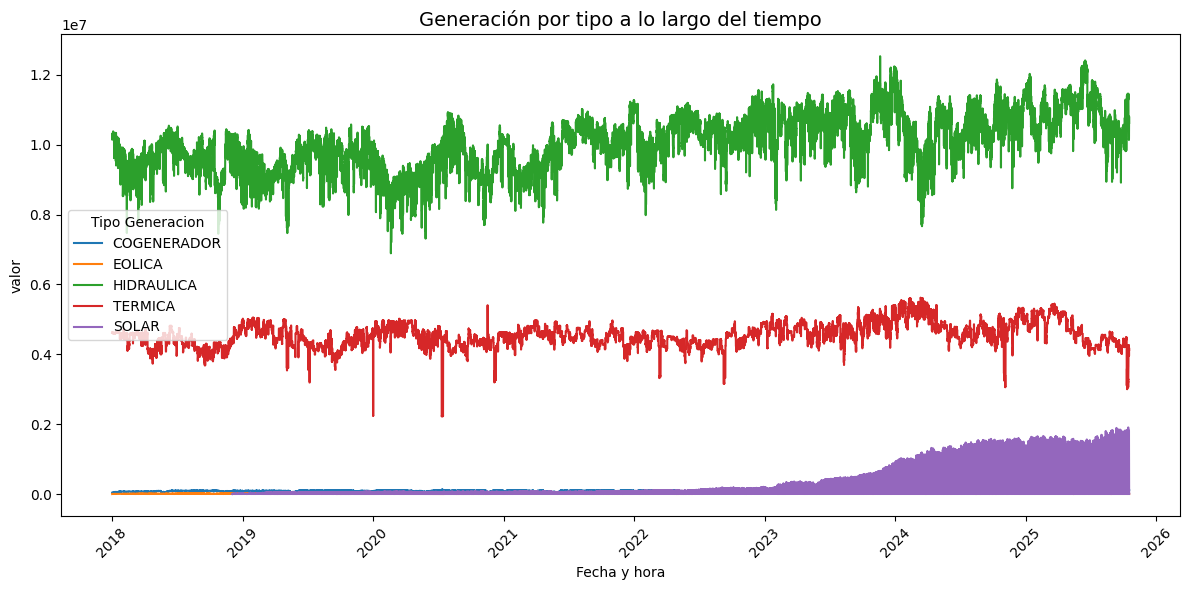

In [108]:

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=expanded_cen,               # your DataFrame
    x="fecha_hora", 
    y="valor", 
    hue="Tipo Generacion",      # color legend by generation type
)

# Format
plt.title("Generación por tipo a lo largo del tiempo", fontsize=14)
plt.xlabel("Fecha y hora")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


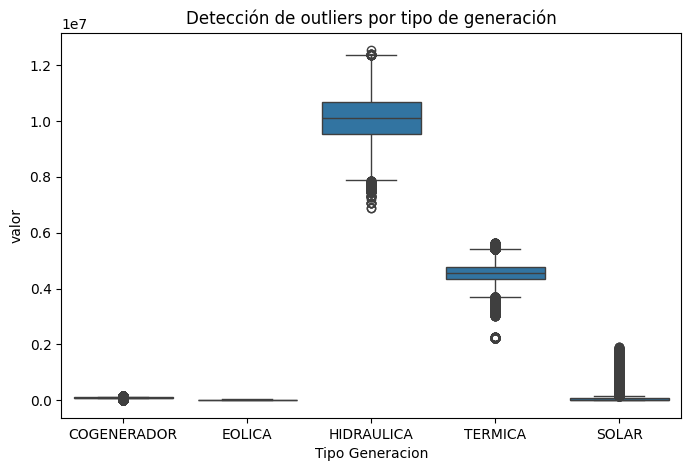

In [110]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=expanded_cen, x="Tipo Generacion", y="valor")
plt.title("Detección de outliers por tipo de generación")
plt.show()

In [11]:
disp_declarada = pd.read_excel("insumos\Data_DisponibilidadDeclarada.xlsx", header=0)
disp_declarada.head()

,Fecha,Tipo Generacion,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,COGENERADOR,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,...,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0
1,2018-01-01,EOLICA,NaN,1000.0,1000.0,1000.0,NaN,NaN,NaN,NaN,...,1460.0,1980.0,1450.0,1370.0,1610.0,1330.0,1000.0,1000.0,1000.0,1000.0
2,2018-01-01,HIDRAULICA,10226320.0,10144320.0,10144320.0,10168840.0,10189960.0,10189960.0,10187960.0,10234960.0,...,10171320.0,10171320.0,10199960.0,10234960.0,10316960.0,10312960.0,10302960.0,10169960.0,10160960.0,10160960.0
3,2018-01-01,TERMICA,4618740.0,4617950.0,4617950.0,4617840.0,4617850.0,4617850.0,4620850.0,4615710.0,...,4620940.0,4620950.0,4620770.0,4624800.0,4625690.0,4625620.0,4626650.0,4626650.0,4626750.0,4626750.0
4,2018-01-02,COGENERADOR,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,...,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0


In [105]:
expanded_disp_declarada = expand_hours(disp_declarada)
expanded_disp_declarada

,Fecha,Tipo Generacion,hora,valor,fecha_hora
0,2018-01-01,COGENERADOR,0,3.730000e+04,2018-01-01 00:00:00
1,2018-01-01,EOLICA,0,0.000000e+00,2018-01-01 00:00:00
2,2018-01-01,HIDRAULICA,0,1.022632e+07,2018-01-01 00:00:00
3,2018-01-01,TERMICA,0,4.618740e+06,2018-01-01 00:00:00
4,2018-01-02,COGENERADOR,0,3.730000e+04,2018-01-02 00:00:00
...,...,...,...,...,...
326899,2025-10-16,COGENERADOR,23,1.068000e+05,2025-10-16 23:00:00
326900,2025-10-16,EOLICA,23,2.000000e+03,2025-10-16 23:00:00
326901,2025-10-16,HIDRAULICA,23,1.062219e+07,2025-10-16 23:00:00
326902,2025-10-16,SOLAR,23,1.000000e+01,2025-10-16 23:00:00


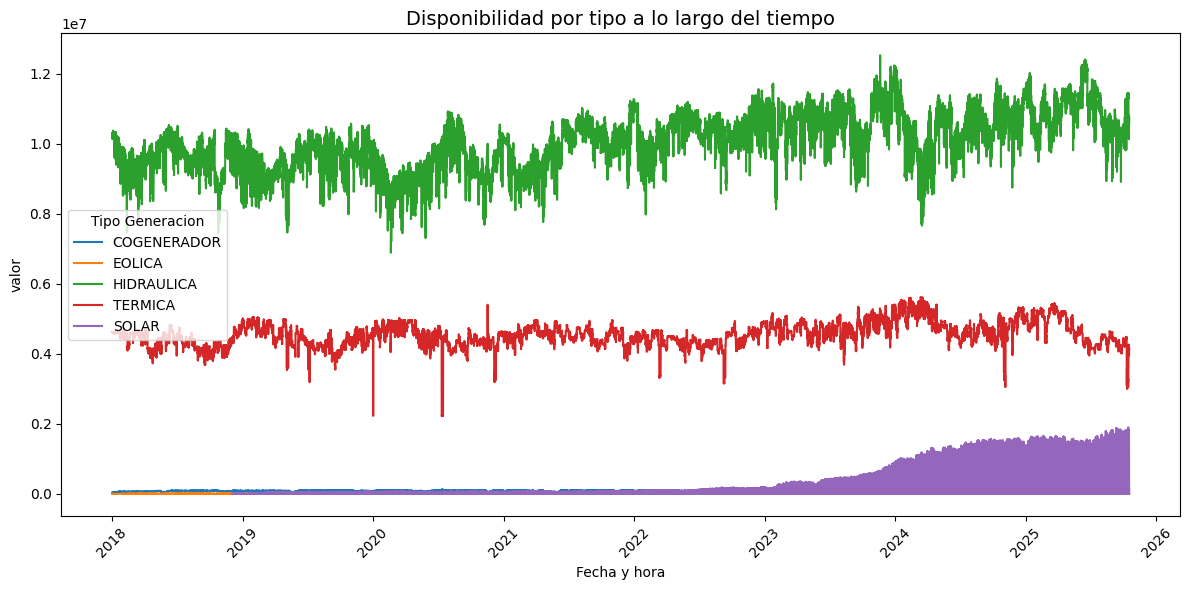

In [107]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=expanded_disp_declarada,               # your DataFrame
    x="fecha_hora", 
    y="valor", 
    hue="Tipo Generacion",      # color legend by generation type
)

# Format
plt.title("Disponibilidad por tipo a lo largo del tiempo", fontsize=14)
plt.xlabel("Fecha y hora")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [16]:
greal = pd.read_excel("insumos\Data_GeneracionReal.xlsx", header=0)
greal.head()

,Fecha,Tipo Generacion,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,COGENERADOR,11229.39,16010.01,12868.47,12610.87,18727.49,17818.47,16327.67,16917.25,...,15173.40,15460.24,17968.37,18199.06,19505.77,19390.96,15095.38,19509.36,21024.02,19759.74
1,2018-01-01,EOLICA,690.92,335.34,412.36,314.29,119.98,10.57,137.04,361.39,...,1508.96,2510.55,2884.81,2719.36,1823.81,1564.06,1134.21,779.34,1377.25,1728.11
2,2018-01-01,HIDRAULICA,4760322.65,4527134.06,4375656.98,4225279.62,4129746.78,4098529.53,3979344.02,4021581.22,...,4259025.77,4187586.85,4167906.53,4439571.70,5460366.05,5618856.51,5447265.29,5078623.12,4596617.29,4307263.58
3,2018-01-01,SOLAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.52,...,5028.00,3102.00,1356.00,134.24,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,TERMICA,1277047.97,1266173.77,1242631.02,1215455.63,1188698.62,1093144.81,939059.09,904672.23,...,1257289.91,1266071.85,1268091.98,1266233.40,1321145.41,1382686.48,1416332.20,1389973.69,1354690.07,1288683.46


In [9]:
hidro = pd.read_excel("insumos\Data_Hidrología.xlsx", header=0)
hidro.head()

,Fecha,Volumen Útil diario %,Volumen Útil diario Energía,Aportes %,Aportes Energía,Aportes Media Histórica Energía,Volumen Útil diario %_Lag 1,Volumen Útil diario %_Lag 2,Aportes %_Lag 1,Aportes %_Lag 2
0,2018-01-01,0.646862,11113.0801,1.266686,130.9373,103.37,0.646862,0.646862,1.266686,1.266686
1,2018-01-02,0.647943,11131.6630,1.321926,136.6475,103.37,0.646862,0.646862,1.266686,1.266686
2,2018-01-03,0.648684,11144.3944,1.452599,150.1552,103.37,0.647943,0.646862,1.321926,1.266686
3,2018-01-04,0.648788,11146.1807,1.377331,142.3747,103.37,0.648684,0.647943,1.452599,1.321926
4,2018-01-05,0.648888,11147.8877,1.433575,148.1886,103.37,0.648788,0.648684,1.377331,1.452599


In [7]:
import_export = pd.read_excel("insumos\Data_Importaciones_Exportaciones.xlsx", header=0)
import_export.head()

,Fecha,Importaciones Energía,Exportaciones Energía
0,2018-01-01,3.008714,0.002632
1,2018-01-02,1.519736,0.002640
2,2018-01-03,4.604653,0.001440
3,2018-01-04,4.838480,0.001650
4,2018-01-05,1.769728,0.009742


In [8]:
precios = pd.read_excel("insumos\Data_Precios.xlsx", header=0)
precios.head()

,Fecha,Precio Bolsa TIE,Máximo Precio de Oferta Nacional,Precio Bolsa Nacional
0,2018-01-01,120.937000,120.910298,121.032086
1,2018-01-02,136.176905,136.163131,136.319519
2,2018-01-03,134.908631,134.847964,135.042331
3,2018-01-04,144.174964,144.174964,144.265844
4,2018-01-05,135.591339,135.591339,136.401501


### Punto 2. Transformación de datos

En esta sección se realizará la integración y transformación de los datos provenientes de los archivos Data_GeneracionReal.xlsx, Data_DisponibilidadDeclarada.xlsx y Data_CapacidadEfectivaNeta.xlsx. El objetivo principal es consolidar la información en un único dataset que permita, para cada día de operación y tipo de generación, visualizar los datos de manera conjunta

In [18]:
greal.columns

Index([          'Fecha', 'Tipo Generacion',                 0,
                       1,                 2,                 3,
                       4,                 5,                 6,
                       7,                 8,                 9,
                      10,                11,                12,
                      13,                14,                15,
                      16,                17,                18,
                      19,                20,                21,
                      22,                23],
      dtype='object')

In [23]:
greal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            13863 non-null  object 
 1   Tipo Generacion  13863 non-null  object 
 2   0                11296 non-null  float64
 3   1                11265 non-null  float64
 4   2                11254 non-null  float64
 5   3                11260 non-null  float64
 6   4                11281 non-null  float64
 7   5                12463 non-null  float64
 8   6                13498 non-null  float64
 9   7                13573 non-null  float64
 10  8                13627 non-null  float64
 11  9                13666 non-null  float64
 12  10               13733 non-null  float64
 13  11               13750 non-null  float64
 14  12               13769 non-null  float64
 15  13               13769 non-null  float64
 16  14               13755 non-null  float64
 17  15          

In [42]:
greal.fillna(0, inplace=True)
disp_declarada.fillna(0, inplace=True)
cen.fillna(0, inplace=True) 

In [43]:
# transponer la tabla para sumar por dia
greal_diaria =  greal.set_index(['Fecha', 'Tipo Generacion'])
greal_diaria = pd.DataFrame(greal_diaria.T.sum())
greal_diaria.columns = ['generacion_diaria']
greal_diaria.reset_index(inplace=True)
greal_diaria

,Fecha,Tipo Generacion,generacion_diaria
0,2018-01-01,COGENERADOR,4.037529e+05
1,2018-01-01,EOLICA,2.638913e+04
2,2018-01-01,HIDRAULICA,1.071404e+08
3,2018-01-01,SOLAR,2.150976e+04
4,2018-01-01,TERMICA,2.923429e+07
...,...,...,...
13858,2025-10-13,COGENERADOR,2.190272e+06
13859,2025-10-13,EOLICA,5.871668e+04
13860,2025-10-13,HIDRAULICA,1.728983e+08
13861,2025-10-13,SOLAR,1.362821e+07


In [38]:
# transponer la tabla para sumar por dia
disp_diaria =  disp_declarada.set_index(['Fecha', 'Tipo Generacion'])
disp_diaria = pd.DataFrame(disp_diaria.T.sum())
disp_diaria.columns = ['disp_declarada_diaria']
disp_diaria.reset_index(inplace=True)
disp_diaria

,Fecha,Tipo Generacion,disp_declarada_diaria
0,2018-01-01,COGENERADOR,8.952000e+05
1,2018-01-01,EOLICA,2.400000e+04
2,2018-01-01,HIDRAULICA,2.451298e+08
3,2018-01-01,TERMICA,1.109148e+08
4,2018-01-02,COGENERADOR,8.952000e+05
...,...,...,...
13616,2025-10-16,COGENERADOR,2.521200e+06
13617,2025-10-16,EOLICA,8.006000e+04
13618,2025-10-16,HIDRAULICA,2.491162e+08
13619,2025-10-16,SOLAR,1.386141e+07


In [45]:
disp_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13621 entries, 0 to 13620
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha                  13621 non-null  object 
 1   Tipo Generacion        13621 non-null  object 
 2   disp_declarada_diaria  13621 non-null  float64
dtypes: float64(1), object(2)
memory usage: 319.4+ KB


In [39]:
# transponer la tabla para sumar por dia
cen_diaria =  cen.set_index(['Fecha', 'Tipo Generacion'])
cen_diaria = pd.DataFrame(cen_diaria.T.sum())
cen_diaria.columns = ['cen_diaria']
cen_diaria.reset_index(inplace=True)
cen_diaria

,Fecha,Tipo Generacion,cen_diaria
0,2018-01-01,COGENERADOR,8.952000e+05
1,2018-01-01,EOLICA,2.400000e+04
2,2018-01-01,HIDRAULICA,2.451298e+08
3,2018-01-01,TERMICA,1.109148e+08
4,2018-01-02,COGENERADOR,8.952000e+05
...,...,...,...
13616,2025-10-16,COGENERADOR,2.521200e+06
13617,2025-10-16,EOLICA,8.006000e+04
13618,2025-10-16,HIDRAULICA,2.491162e+08
13619,2025-10-16,SOLAR,1.386141e+07


In [46]:
cen_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13621 entries, 0 to 13620
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            13621 non-null  object 
 1   Tipo Generacion  13621 non-null  object 
 2   cen_diaria       13621 non-null  float64
dtypes: float64(1), object(2)
memory usage: 319.4+ KB


In [51]:
merge_greal_cen = pd.merge(greal_diaria, cen_diaria, left_on=['Fecha',	'Tipo Generacion'], right_on=['Fecha',	'Tipo Generacion'], how="left")
display(merge_greal_cen.head())

,Fecha,Tipo Generacion,generacion_diaria,cen_diaria
0,2018-01-01,COGENERADOR,4.037529e+05,895200.0
1,2018-01-01,EOLICA,2.638913e+04,24000.0
2,2018-01-01,HIDRAULICA,1.071404e+08,245129800.0
3,2018-01-01,SOLAR,2.150976e+04,NaN
4,2018-01-01,TERMICA,2.923429e+07,110914780.0


In [ ]:
# verificando nulos
cen[cen['Fecha'] == '2018-01-01']

,Fecha,Tipo Generacion,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,COGENERADOR,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,...,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0,37300.0
1,2018-01-01,EOLICA,0.0,1000.0,1000.0,1000.0,0.0,0.0,0.0,0.0,...,1460.0,1980.0,1450.0,1370.0,1610.0,1330.0,1000.0,1000.0,1000.0,1000.0
2,2018-01-01,HIDRAULICA,10226320.0,10144320.0,10144320.0,10168840.0,10189960.0,10189960.0,10187960.0,10234960.0,...,10171320.0,10171320.0,10199960.0,10234960.0,10316960.0,10312960.0,10302960.0,10169960.0,10160960.0,10160960.0
3,2018-01-01,TERMICA,4618740.0,4617950.0,4617950.0,4617840.0,4617850.0,4617850.0,4620850.0,4615710.0,...,4620940.0,4620950.0,4620770.0,4624800.0,4625690.0,4625620.0,4626650.0,4626650.0,4626750.0,4626750.0


In [49]:
merge_greal_cen.info(), merge_greal_cen.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              13863 non-null  object 
 1   Tipo Generacion    13863 non-null  object 
 2   generacion_diaria  13863 non-null  float64
 3   cen_diaria         13580 non-null  float64
dtypes: float64(2), object(2)
memory usage: 433.3+ KB


(None, (13863, 4))

In [41]:
merge_greal_cen_disp = pd.merge(merge_greal_cen, disp_diaria, left_on=['Fecha',	'Tipo Generacion'], right_on=['Fecha',	'Tipo Generacion'], how="left")
merge_greal_cen_disp

,Fecha,Tipo Generacion,generacion_diaria,cen_diaria,disp_declarada_diaria
0,2018-01-01,COGENERADOR,4.037529e+05,8.952000e+05,8.952000e+05
1,2018-01-01,EOLICA,2.638913e+04,2.400000e+04,2.400000e+04
2,2018-01-01,HIDRAULICA,1.071404e+08,2.451298e+08,2.451298e+08
3,2018-01-01,SOLAR,2.150976e+04,NaN,NaN
4,2018-01-01,TERMICA,2.923429e+07,1.109148e+08,1.109148e+08
...,...,...,...,...,...
13858,2025-10-13,COGENERADOR,2.190272e+06,2.613200e+06,2.613200e+06
13859,2025-10-13,EOLICA,5.871668e+04,8.173000e+04,8.173000e+04
13860,2025-10-13,HIDRAULICA,1.728983e+08,2.719466e+08,2.719466e+08
13861,2025-10-13,SOLAR,1.362821e+07,1.427259e+07,1.427259e+07


In [50]:
merge_greal_cen_disp.info(), merge_greal_cen_disp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha                  13863 non-null  object 
 1   Tipo Generacion        13863 non-null  object 
 2   generacion_diaria      13863 non-null  float64
 3   cen_diaria             13580 non-null  float64
 4   disp_declarada_diaria  13580 non-null  float64
dtypes: float64(3), object(2)
memory usage: 541.7+ KB


(None, (13863, 5))

In [54]:
merge_greal_cen_disp = merge_greal_cen_disp.dropna()
merge_greal_cen_disp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13580 entries, 0 to 13862
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha                  13580 non-null  object 
 1   Tipo Generacion        13580 non-null  object 
 2   generacion_diaria      13580 non-null  float64
 3   cen_diaria             13580 non-null  float64
 4   disp_declarada_diaria  13580 non-null  float64
dtypes: float64(3), object(2)
memory usage: 636.6+ KB


In [ ]:
# Generacion real , capacidad efectiva neta, disponibilidad declarada
merge_greal_cen_disp.head()

,Fecha,Tipo Generacion,generacion_diaria,cen_diaria,disp_declarada_diaria
0,2018-01-01,COGENERADOR,4.037529e+05,895200.0,895200.0
1,2018-01-01,EOLICA,2.638913e+04,24000.0,24000.0
2,2018-01-01,HIDRAULICA,1.071404e+08,245129800.0,245129800.0
4,2018-01-01,TERMICA,2.923429e+07,110914780.0,110914780.0
5,2018-01-02,COGENERADOR,6.801637e+05,895200.0,895200.0


In [58]:
merge_greal_cen_disp.rename(columns={'Tipo Generacion': 'TipoGeneracion'}, inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_18812\3144663256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_greal_cen_disp.rename(columns={'Tipo Generacion': 'TipoGeneracion'}, inplace=True)


In [70]:
greal_cen_disp_hidr_term = merge_greal_cen_disp.query('TipoGeneracion == "HIDRAULICA" or TipoGeneracion == "TERMICA"')[['Fecha', 'TipoGeneracion', 'generacion_diaria']]
greal_cen_disp_hidr_term = greal_cen_disp_hidr_term.pivot(index='Fecha', columns='TipoGeneracion', values='generacion_diaria').reset_index()
greal_cen_disp_hidr_term.columns = ['Fecha', 'Generacion_Hidraulica', 'Generacion_Termica']
greal_cen_disp_hidr_term.head()

,Fecha,Generacion_Hidraulica,Generacion_Termica
0,2018-01-01,1.071404e+08,29234286.33
1,2018-01-02,1.285159e+08,32435320.19
2,2018-01-03,1.363210e+08,31584512.06
3,2018-01-04,1.390160e+08,32896551.76
4,2018-01-05,1.432203e+08,34502095.14


In [71]:
cen_sistema = cen_diaria[['Fecha', 'cen_diaria']].groupby('Fecha').sum().reset_index()
cen_sistema

,Fecha,cen_diaria
0,2018-01-01,3.569638e+08
1,2018-01-02,3.575940e+08
2,2018-01-03,3.583262e+08
3,2018-01-04,3.576383e+08
4,2018-01-05,3.574547e+08
...,...,...
2841,2025-10-12,3.619307e+08
2842,2025-10-13,3.662459e+08
2843,2025-10-14,3.710510e+08
2844,2025-10-15,3.757910e+08


In [73]:
merge_greal_cen_diaria = pd.merge(greal_cen_disp_hidr_term, cen_sistema, on='Fecha', how='left')
merge_greal_cen_diaria.columns = ['Fecha', 'Generacion_Hidraulica', 'Generacion_Termica', 'CEN_Sistema']
merge_greal_cen_diaria.head()

,Fecha,Generacion_Hidraulica,Generacion_Termica,CEN_Sistema
0,2018-01-01,1.071404e+08,29234286.33,356963780.0
1,2018-01-02,1.285159e+08,32435320.19,357593970.0
2,2018-01-03,1.363210e+08,31584512.06,358326190.0
3,2018-01-04,1.390160e+08,32896551.76,357638310.0
4,2018-01-05,1.432203e+08,34502095.14,357454690.0


In [76]:
merge_greal_cen_diaria['%Disponibilidad_Hidraulica'] = merge_greal_cen_diaria['Generacion_Hidraulica'] / merge_greal_cen_diaria['CEN_Sistema']
merge_greal_cen_diaria['%Disponibilidad_Termica'] = merge_greal_cen_diaria['Generacion_Termica'] / merge_greal_cen_diaria['CEN_Sistema']
merge_greal_cen_diaria.head()

,Fecha,Generacion_Hidraulica,Generacion_Termica,CEN_Sistema,%Disponibilidad_Hidraulica,%Disponibilidad_Termica
0,2018-01-01,1.071404e+08,29234286.33,356963780.0,0.300144,0.081897
1,2018-01-02,1.285159e+08,32435320.19,357593970.0,0.359391,0.090704
2,2018-01-03,1.363210e+08,31584512.06,358326190.0,0.380438,0.088145
3,2018-01-04,1.390160e+08,32896551.76,357638310.0,0.388706,0.091983
4,2018-01-05,1.432203e+08,34502095.14,357454690.0,0.400667,0.096522


In [77]:
import os
from openpyxl import Workbook

def save_to_excel(df: pd.DataFrame, file_path: str, sheet_name: str):
    """
    Saves a DataFrame to an Excel file.
    - If the file does not exist, it is created.
    - If it exists, the sheet is added without deleting other sheets.

    Args:
        df (pd.DataFrame): DataFrame to save.
        file_path (str): Path to the Excel file.
        sheet_name (str): Name of the sheet to create or overwrite.
    """
    # Create file if it doesn't exist
    if not os.path.exists(file_path):
        print(f"File not found. Creating new file: {file_path}")
        wb = Workbook()
        wb.save(file_path)

    # Write or update the sheet
    with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        df.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"Sheet '{sheet_name}' saved successfully in '{file_path}'")


In [78]:
save_to_excel(df=merge_greal_cen_diaria, file_path="Data_Operativa.xlsx", sheet_name="Data_Operativa")

File not found. Creating new file: Data_Operativa.xlsx
Sheet 'Data_Operativa' saved successfully in 'Data_Operativa.xlsx'


### Punto 3. Matriz de Correlación

En esta sección se construirá una matriz de correlación entre las variables disponibles en el archivo Data_Importaciones_Exportaciones.xlsx. El objetivo es identificar qué variables presentan una mayor relación estadística con la variable objetivo Importaciones de Energía

In [132]:
import_export.Fecha = pd.to_datetime(import_export.Fecha)
import_export.info()
import_export.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  2843 non-null   datetime64[ns]
 1   Importaciones Energía  2399 non-null   float64       
 2   Exportaciones Energía  2443 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 66.8 KB


,Fecha,Importaciones Energía,Exportaciones Energía
0,2018-01-01,3.008714,0.002632
1,2018-01-02,1.519736,0.002640
2,2018-01-03,4.604653,0.001440
3,2018-01-04,4.838480,0.001650
4,2018-01-05,1.769728,0.009742


In [131]:
data_operativa = merge_greal_cen_diaria.copy()
data_operativa.Fecha = pd.to_datetime(data_operativa.Fecha)
data_operativa.info()
data_operativa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fecha                       2843 non-null   datetime64[ns]
 1   Generacion_Hidraulica       2843 non-null   float64       
 2   Generacion_Termica          2843 non-null   float64       
 3   CEN_Sistema                 2843 non-null   float64       
 4   %Disponibilidad_Hidraulica  2843 non-null   float64       
 5   %Disponibilidad_Termica     2843 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 133.4 KB


,Fecha,Generacion_Hidraulica,Generacion_Termica,CEN_Sistema,%Disponibilidad_Hidraulica,%Disponibilidad_Termica
0,2018-01-01,1.071404e+08,29234286.33,356963780.0,0.300144,0.081897
1,2018-01-02,1.285159e+08,32435320.19,357593970.0,0.359391,0.090704
2,2018-01-03,1.363210e+08,31584512.06,358326190.0,0.380438,0.088145
3,2018-01-04,1.390160e+08,32896551.76,357638310.0,0.388706,0.091983
4,2018-01-05,1.432203e+08,34502095.14,357454690.0,0.400667,0.096522


In [130]:
precios.Fecha = pd.to_datetime(precios.Fecha)
precios.info()
precios.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Fecha                             2843 non-null   datetime64[ns]
 1   Precio Bolsa TIE                  2841 non-null   float64       
 2   Máximo Precio de Oferta Nacional  2819 non-null   float64       
 3   Precio Bolsa Nacional             2843 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 89.0 KB


,Fecha,Precio Bolsa TIE,Máximo Precio de Oferta Nacional,Precio Bolsa Nacional
0,2018-01-01,120.937000,120.910298,121.032086
1,2018-01-02,136.176905,136.163131,136.319519
2,2018-01-03,134.908631,134.847964,135.042331
3,2018-01-04,144.174964,144.174964,144.265844
4,2018-01-05,135.591339,135.591339,136.401501


In [129]:
hidro.Fecha = pd.to_datetime(hidro.Fecha)
hidro.info()
hidro.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha                            2845 non-null   datetime64[ns]
 1   Volumen Útil  diario %           2845 non-null   float64       
 2   Volumen Útil diario Energía      2845 non-null   float64       
 3   Aportes %                        2845 non-null   float64       
 4   Aportes  Energía                 2845 non-null   float64       
 5   Aportes Media Histórica Energía  2845 non-null   float64       
 6   Volumen Útil  diario %_Lag 1     2845 non-null   float64       
 7   Volumen Útil  diario %_Lag 2     2845 non-null   float64       
 8   Aportes %_Lag 1                  2845 non-null   float64       
 9   Aportes %_Lag 2                  2845 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 222.4 KB


,Fecha,Volumen Útil diario %,Volumen Útil diario Energía,Aportes %,Aportes Energía,Aportes Media Histórica Energía,Volumen Útil diario %_Lag 1,Volumen Útil diario %_Lag 2,Aportes %_Lag 1,Aportes %_Lag 2
0,2018-01-01,0.646862,11113.0801,1.266686,130.9373,103.37,0.646862,0.646862,1.266686,1.266686
1,2018-01-02,0.647943,11131.6630,1.321926,136.6475,103.37,0.646862,0.646862,1.266686,1.266686
2,2018-01-03,0.648684,11144.3944,1.452599,150.1552,103.37,0.647943,0.646862,1.321926,1.266686
3,2018-01-04,0.648788,11146.1807,1.377331,142.3747,103.37,0.648684,0.647943,1.452599,1.321926
4,2018-01-05,0.648888,11147.8877,1.433575,148.1886,103.37,0.648788,0.648684,1.377331,1.452599


In [133]:
from functools import reduce

dfs = [import_export, precios, hidro, data_operativa]
df_combined = reduce(lambda left, right: pd.merge(left, right, on='Fecha', how='inner'), dfs)
df_combined.head()

,Fecha,Importaciones Energía,Exportaciones Energía,Precio Bolsa TIE,Máximo Precio de Oferta Nacional,Precio Bolsa Nacional,Volumen Útil diario %,Volumen Útil diario Energía,Aportes %,Aportes Energía,Aportes Media Histórica Energía,Volumen Útil diario %_Lag 1,Volumen Útil diario %_Lag 2,Aportes %_Lag 1,Aportes %_Lag 2,Generacion_Hidraulica,Generacion_Termica,CEN_Sistema,%Disponibilidad_Hidraulica,%Disponibilidad_Termica
0,2018-01-01,3.008714,0.002632,120.937000,120.910298,121.032086,0.646862,11113.0801,1.266686,130.9373,103.37,0.646862,0.646862,1.266686,1.266686,1.071404e+08,29234286.33,356963780.0,0.300144,0.081897
1,2018-01-02,1.519736,0.002640,136.176905,136.163131,136.319519,0.647943,11131.6630,1.321926,136.6475,103.37,0.646862,0.646862,1.266686,1.266686,1.285159e+08,32435320.19,357593970.0,0.359391,0.090704
2,2018-01-03,4.604653,0.001440,134.908631,134.847964,135.042331,0.648684,11144.3944,1.452599,150.1552,103.37,0.647943,0.646862,1.321926,1.266686,1.363210e+08,31584512.06,358326190.0,0.380438,0.088145
3,2018-01-04,4.838480,0.001650,144.174964,144.174964,144.265844,0.648788,11146.1807,1.377331,142.3747,103.37,0.648684,0.647943,1.452599,1.321926,1.390160e+08,32896551.76,357638310.0,0.388706,0.091983
4,2018-01-05,1.769728,0.009742,135.591339,135.591339,136.401501,0.648888,11147.8877,1.433575,148.1886,103.37,0.648788,0.648684,1.377331,1.452599,1.432203e+08,34502095.14,357454690.0,0.400667,0.096522


In [135]:
df_combined.info(), df_combined.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Fecha                             2843 non-null   datetime64[ns]
 1   Importaciones Energía             2399 non-null   float64       
 2   Exportaciones Energía             2443 non-null   float64       
 3   Precio Bolsa TIE                  2841 non-null   float64       
 4   Máximo Precio de Oferta Nacional  2819 non-null   float64       
 5   Precio Bolsa Nacional             2843 non-null   float64       
 6   Volumen Útil  diario %            2843 non-null   float64       
 7   Volumen Útil diario Energía       2843 non-null   float64       
 8   Aportes %                         2843 non-null   float64       
 9   Aportes  Energía                  2843 non-null   float64       
 10  Aportes Media Histórica Energía   2843 non-null 

(None, (2843, 20))

In [197]:
# correlación entre variables importantes
corr_matrix = df_combined[['Importaciones Energía', 'Volumen Útil diario Energía', 'Aportes  Energía', 'Máximo Precio de Oferta Nacional', 'Precio Bolsa TIE'
                           , '%Disponibilidad_Hidraulica', '%Disponibilidad_Termica', 'Precio Bolsa Nacional', 'Aportes %_Lag 2']].corr()


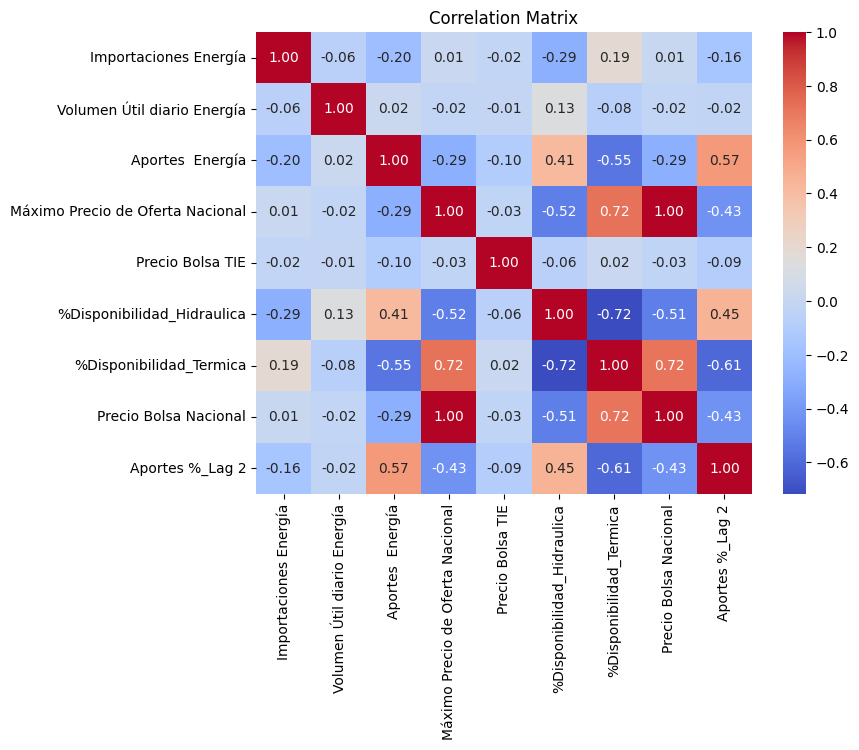

In [198]:
# matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [199]:
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top_corr = corr_pairs.abs().sort_values(ascending=False)
top_corr['Importaciones Energía']


%Disponibilidad_Hidraulica          0.288489
Aportes  Energía                    0.202298
%Disponibilidad_Termica             0.194094
Aportes %_Lag 2                     0.159524
Volumen Útil diario Energía         0.064676
Precio Bolsa TIE                    0.019503
Máximo Precio de Oferta Nacional    0.014753
Precio Bolsa Nacional               0.012787
dtype: float64

In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [203]:
# columnas a normalizar
cols = ['Importaciones Energía', '%Disponibilidad_Hidraulica',  '%Disponibilidad_Termica', 'Máximo Precio de Oferta Nacional', 'Aportes %_Lag 2']

# normalizar y reemplazar en una copia
df_norm = df_combined.copy()
df_norm[cols] = scaler.fit_transform(df_norm[cols])

# Melt para hacer una grafica
df_melted = df_norm.melt(id_vars='Fecha', value_vars=cols,
                         var_name='variable', value_name='valor_normalizado')
df_melted

,Fecha,variable,valor_normalizado
0,2018-01-01,Importaciones Energía,0.275749
1,2018-01-02,Importaciones Energía,0.139284
2,2018-01-03,Importaciones Energía,0.422018
3,2018-01-04,Importaciones Energía,0.443448
4,2018-01-05,Importaciones Energía,0.162195
...,...,...,...
14210,2025-10-09,Aportes %_Lag 2,0.186284
14211,2025-10-10,Aportes %_Lag 2,0.247294
14212,2025-10-11,Aportes %_Lag 2,0.175999
14213,2025-10-12,Aportes %_Lag 2,0.268981


In [204]:
# filtrar fechas para mejor visualización
df_melted_filtered = df_melted.query('Fecha >= "2025-01-01" and Fecha <= "2025-10-13"')

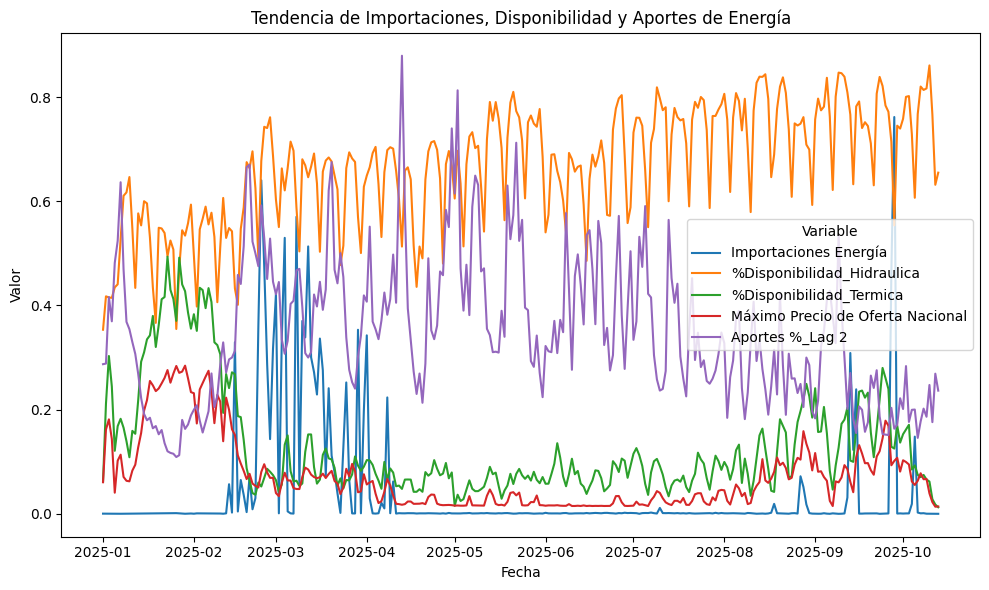

In [205]:
# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted_filtered, x='Fecha', y='valor_normalizado', hue='variable')
plt.title('Tendencia de Importaciones, Disponibilidad y Aportes de Energía')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend(title='Variable')
plt.tight_layout()
plt.show()

Variables elegidas: 
- 'Aportes  Energía', 
- '%Disponibilidad_Termica', 
- 'Máximo Precio de Oferta Nacional'

### Punto 4. Modelo de pronóstico 

En este apartado se desarrollará un modelo de pronóstico para estimar los valores diarios de la variable Importaciones de Energía durante el periodo del 14 al 20 de octubre de 2025.

In [214]:
df_predict = df_norm[['Fecha','Importaciones Energía', 'Aportes  Energía', '%Disponibilidad_Termica', 'Máximo Precio de Oferta Nacional']].copy()
df_predict['Fecha'] = pd.to_datetime(df_predict['Fecha'])
df_predict = df_predict.sort_values('Fecha')
df_predict.head()

,Fecha,Importaciones Energía,Aportes Energía,%Disponibilidad_Termica,Máximo Precio de Oferta Nacional
0,2018-01-01,0.275749,130.9373,0.141745,0.023140
1,2018-01-02,0.139284,136.6475,0.172871,0.029406
2,2018-01-03,0.422018,150.1552,0.163825,0.028866
3,2018-01-04,0.443448,142.3747,0.177389,0.032698
4,2018-01-05,0.162195,148.1886,0.193430,0.029171


In [215]:
# lag de valores para cada variable
for col in ['Aportes  Energía', '%Disponibilidad_Termica', 'Máximo Precio de Oferta Nacional']:
    df_predict[f'{col}_lag1'] = df_predict[col].shift(1)

# Eliminar primera fila con NaN causada por el shift
df_predict = df_predict.dropna()
df_predict.head()

,Fecha,Importaciones Energía,Aportes Energía,%Disponibilidad_Termica,Máximo Precio de Oferta Nacional,Aportes Energía_lag1,%Disponibilidad_Termica_lag1,Máximo Precio de Oferta Nacional_lag1
1,2018-01-02,0.139284,136.6475,0.172871,0.029406,130.9373,0.141745,0.023140
2,2018-01-03,0.422018,150.1552,0.163825,0.028866,136.6475,0.172871,0.029406
3,2018-01-04,0.443448,142.3747,0.177389,0.032698,150.1552,0.163825,0.028866
4,2018-01-05,0.162195,148.1886,0.193430,0.029171,142.3747,0.177389,0.032698
5,2018-01-06,0.376211,118.1490,0.201038,0.029328,148.1886,0.193430,0.029171


In [216]:
# separar en train y test
train_size = int(len(df_predict) * 0.9)
train, test = df_predict.iloc[:train_size], df_predict.iloc[train_size:]
train.shape, test.shape

((2134, 8), (238, 8))

In [217]:
train.head(), test.head()

(       Fecha  Importaciones Energía  Aportes  Energía  \
 1 2018-01-02               0.139284          136.6475   
 2 2018-01-03               0.422018          150.1552   
 3 2018-01-04               0.443448          142.3747   
 4 2018-01-05               0.162195          148.1886   
 5 2018-01-06               0.376211          118.1490   
 
    %Disponibilidad_Termica  Máximo Precio de Oferta Nacional  \
 1                 0.172871                          0.029406   
 2                 0.163825                          0.028866   
 3                 0.177389                          0.032698   
 4                 0.193430                          0.029171   
 5                 0.201038                          0.029328   
 
    Aportes  Energía_lag1  %Disponibilidad_Termica_lag1  \
 1               130.9373                      0.141745   
 2               136.6475                      0.172871   
 3               150.1552                      0.163825   
 4               142.3

In [218]:
train.columns

Index(['Fecha', 'Importaciones Energía', 'Aportes  Energía',
       '%Disponibilidad_Termica', 'Máximo Precio de Oferta Nacional',
       'Aportes  Energía_lag1', '%Disponibilidad_Termica_lag1',
       'Máximo Precio de Oferta Nacional_lag1'],
      dtype='object')

In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ['Máximo Precio de Oferta Nacional_lag1', '%Disponibilidad_Termica_lag1', 'Aportes  Energía_lag1']
target = 'Importaciones Energía'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred


array([0.03329642, 0.06712981, 0.26404824, 0.14545343, 0.17758489,
       0.17543883, 0.02206632, 0.04560685, 0.03997284, 0.03879064,
       0.04025871, 0.09145618, 0.03124549, 0.07566485, 0.09202615,
       0.08542238, 0.03250229, 0.23380598, 0.30095627, 0.04993083,
       0.04284731, 0.0277313 , 0.02970896, 0.08100862, 0.08184353,
       0.08519244, 0.03479022, 0.12560935, 0.01926838, 0.04636399,
       0.04773676, 0.00705526, 0.00891961, 0.04875197, 0.06383002,
       0.12970653, 0.11276362, 0.04526946, 0.00855492, 0.29935903,
       0.12593071, 0.16334551, 0.08728187, 0.17543699, 0.14222053,
       0.1714002 , 0.1538172 , 0.03717662, 0.06086791, 0.06060948,
       0.04208601, 0.15352065, 0.32012744, 0.21566704, 0.14279206,
       0.00825593, 0.05142426, 0.05992255, 0.22144053, 0.2241858 ,
       0.22681658, 0.15044164, 0.44297376, 0.40514628, 0.24558828,
       0.22742773, 0.24903704, 0.37795049, 0.20978386, 0.21822432,
       0.18996564, 0.18557913, 0.30199695, 0.04397995, 0.09596

In [220]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


MAE: 0.161
R²: -1.420


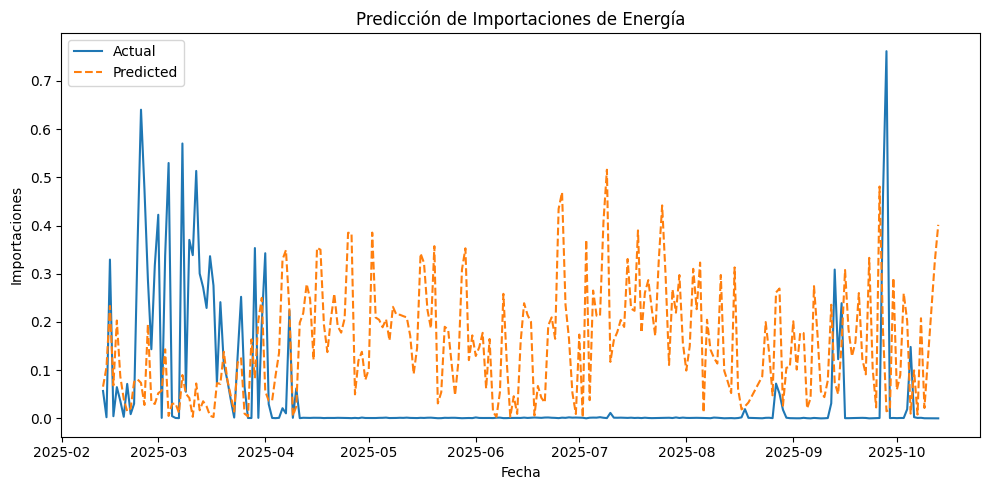

In [213]:
plt.figure(figsize=(10,5))
plt.plot(test['Fecha'], y_test, label='Actual')
plt.plot(test['Fecha'], y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Predicción de Importaciones de Energía')
plt.xlabel('Fecha')
plt.ylabel('Importaciones')
plt.tight_layout()
plt.show()


### Punto 5. Presentación de resultados 

En esta sección se presentarán los resultados del modelo de pronóstico mediante una visualización gráfica que permita comparar el comportamiento histórico de la variable Importaciones de Energía con los valores estimados para los 7 días solicitados. 